# Basic Regression | Google Stocks
1. pandas -> data science library
2. quandl -> library to import financial and economic datasets
3. sklearn -> library to implement ML algos

In [129]:
%matplotlib inline
import pandas as pd
import numpy as np
import quandl
from matplotlib import style,pyplot as plt

In [112]:
style.use("fivethirtyeight")
df = quandl.get("WIKI/GOOGL")
print(df.shape)
df.head()

(3424, 12)


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [113]:
df = df.drop(columns=['Open','High','Low','Close','Volume','Ex-Dividend','Split Ratio'])
df['HL_change'] = ((df['Adj. High']-df['Adj. Low'])/df['Adj. Close'])*100
df['Percent_change'] = ((df['Adj. Close']-df['Adj. Open'])/df['Adj. Open'])*100
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_change,Percent_change
Date,,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,8.072956,0.324968
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,7.921706,7.227007
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,4.049360,-1.227880
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,7.657099,-5.726357
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,3.886792,1.183658


In [114]:
df = df.drop(columns=['Adj. Open','Adj. High','Adj. Low'])

In [115]:
forecast_days = 30
df['Label'] = df['Adj. Close'].shift(-1*forecast_days)
y = np.array(df['Label'],dtype=np.float64)
X = np.array(df.drop(columns=['Label']),dtype=np.float64)
print(X.shape,y.shape)

(3424, 4) (3424,)


In [116]:
from sklearn import preprocessing
X = preprocessing.scale(X)

In [117]:
X = X[:-1*forecast_days]
X_future = X[-1*forecast_days:]
Y = y[:-1*forecast_days]
print(X.shape,X_future.shape,Y.shape)

(3394, 4) (30, 4) (3394,)


In [118]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(2715, 4) (2715,) (679, 4) (679,)


In [119]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train,Y_train)
score = clf.score(X_test,Y_test)
print(score)

0.979833177102


In [120]:
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor()
clf.fit(X_train,Y_train)
score = clf.score(X_test,Y_test)
print(score)

0.979807903522


/home/aditya/.conda/envs/py3k/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [121]:
from sklearn.svm import SVR
clf = SVR(kernel='linear')
clf.fit(X_train,Y_train)
score = clf.score(X_test,Y_test)
print(score)

0.978618185642


In [122]:
Y_future = clf.predict(X_future)
print(Y_future.shape,Y_future)

(30,) [ 1047.32258037  1065.90346108  1083.60887282  1088.07774113  1102.21408518
  1106.29242415  1104.40029592  1102.44327628  1103.98344208  1121.43506242
  1120.56535915  1129.86480547  1126.60319981  1134.48863885  1154.16758688
  1165.93474809  1160.01889461  1171.7565886   1176.18516014  1175.73290388
  1166.78750875  1171.5030981   1170.14137739  1106.9199334   1055.73866773
  1074.17343599  1045.46201559   993.71243314  1032.69387083  1046.31693216]


In [123]:
last_date = df.iloc[-forecast_days-1].name
print(last_date)
last_unix = last_date.timestamp()
one_day = 24*60*60
next_unix = last_unix+one_day
df = df[:-forecast_days]

2018-02-12 00:00:00


In [124]:
import datetime
for i in Y_future:
    next_day = datetime.datetime.fromtimestamp(next_unix)
    df.loc[next_day] = [np.nan for _ in range(len(df.columns)-1)]+[i]
    next_unix+=one_day
df.tail(15)

,Adj. Close,Adj. Volume,HL_change,Percent_change,Label
Date,,,,,
2018-02-28 05:30:00,NaN,NaN,NaN,NaN,1165.934748
2018-03-01 05:30:00,NaN,NaN,NaN,NaN,1160.018895
2018-03-02 05:30:00,NaN,NaN,NaN,NaN,1171.756589
2018-03-03 05:30:00,NaN,NaN,NaN,NaN,1176.185160
2018-03-04 05:30:00,NaN,NaN,NaN,NaN,1175.732904
2018-03-05 05:30:00,NaN,NaN,NaN,NaN,1166.787509
2018-03-06 05:30:00,NaN,NaN,NaN,NaN,1171.503098
2018-03-07 05:30:00,NaN,NaN,NaN,NaN,1170.141377
2018-03-08 05:30:00,NaN,NaN,NaN,NaN,1106.919933


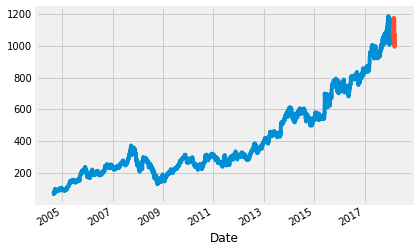

In [130]:
import mpld3
mpld3.enable_notebook()
df[:-1*forecast_days]['Label'].plot()
df[-1*forecast_days:]['Label'].plot()

In [137]:
# df.loc['label_index'] is used for sample selection using label index
# df.iloc['int_index'] is used for sample selection using integer index
# eg df.iloc[5]   df.loc['India']